In [46]:
import pandas as pd
import pickle
from utils.encoder import MultiHotEncoder
import fastf1
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib
import xgboost as xgb
from rec import find_best_strategy
import importlib

from sklearn.metrics import root_mean_squared_error,mean_absolute_error
fastf1.Cache.enable_cache('/Users/zanderbonnet/Desktop/GCU/Proj/f1_cache')
with open('./utils/f1_data.pkl','rb') as f:
    data = pickle.load(f)

# Use the current working directory instead of __file__
model_path = os.path.join(os.getcwd(), 'utils','lapprediction_model.joblib')
model = joblib.load(model_path)

In [ ]:
comp = data[(data['EventName'] == 'Australian Grand Prix') & (data['EventYear'] == 2025)]


AttributeError: 'list' object has no attribute 'isnumeric'

In [67]:
ind = np.where(data['PitLap'] == False)
data.iloc[ind]

,Driver,DriverNumber,Team,LapTime,Compound,FreshTyre,TyreLife,LapNumber,TrackStatus,StartingPosition,Points,ClassifiedPosition,PitLap,EventYear,EventName,LapTime_Qualifying,Rainfall,TrackTemp,AirTemp
0,VER,1,Red Bull Racing,99.019,SOFT,False,4.0,1.0,"[1, 2]",1.0,25.0,1,False,2023,Bahrain Grand Prix,89.708,False,31.2,27.3
1,LEC,16,Ferrari,100.230,SOFT,True,1.0,1.0,"[1, 2]",3.0,0.0,R,False,2023,Bahrain Grand Prix,90.000,False,31.2,27.3
2,PER,11,Red Bull Racing,101.063,SOFT,False,4.0,1.0,"[1, 2]",2.0,18.0,2,False,2023,Bahrain Grand Prix,89.846,False,31.2,27.3
3,SAI,55,Ferrari,101.659,SOFT,False,4.0,1.0,"[1, 2]",4.0,12.0,4,False,2023,Bahrain Grand Prix,90.154,False,31.2,27.3
4,HAM,44,Mercedes,102.288,SOFT,False,4.0,1.0,"[1, 2]",7.0,10.0,5,False,2023,Bahrain Grand Prix,90.384,False,31.2,27.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64171,RUS,63,Mercedes,91.900,HARD,True,14.0,52.0,[1],4.0,1.0,10,False,2025,British Grand Prix,85.029,False,24.3,19.6
64172,BEA,87,Haas F1 Team,92.585,MEDIUM,True,11.0,52.0,[1],18.0,0.0,11,False,2025,British Grand Prix,85.471,False,24.3,19.6
64173,SAI,55,Williams,90.645,MEDIUM,True,11.0,52.0,[1],9.0,0.0,12,False,2025,British Grand Prix,85.746,False,24.3,19.6
64174,OCO,31,Haas F1 Team,90.818,MEDIUM,True,10.0,52.0,[1],14.0,0.0,13,False,2025,British Grand Prix,85.950,False,24.3,19.6


In [29]:
data['ClassifiedPosition'].unique()

array(['1', 'R', '2', '4', '5', '7', '3', '8', '6', '17', '10', '12',
       '15', '11', '16', '13', '9', '14', '18', '19', '20', 'W', 'D'],
      dtype=object)

In [31]:
data[['ClassifiedPosition', 'Driver', 'DriverNumber', 'Points']].sort_values('ClassifiedPosition')

,ClassifiedPosition,Driver,DriverNumber,Points
0,1,VER,1,25.0
43969,1,NOR,4,25.0
43987,1,NOR,4,25.0
44004,1,NOR,4,25.0
8347,1,VER,1,25.0
...,...,...,...,...
20454,W,ALO,14,0.0
20364,W,ALO,14,0.0
20019,W,ALO,14,0.0
19792,W,ALO,14,0.0


In [11]:
3%2

1

In [8]:
df = pd.DataFrame(columns=['Driver', 'Team', 'Compound', 'FreshTyre', 'PitLap', 'EventName', 'EventYear',
                           'TrackStatus',
                           'LapTime_Qualifying',
                           'TyreLife', 'LapNumber', 'StartingPosition'])
new = {
    'Driver': 'NOR',
    'Team': 'Red Bull Racing',
    'Compound': 'HARD',
    'FreshTyre': True,
    'PitLap': True,
    'EventName': 'Saudi Arabian Grand Prix',
    'EventYear': 2025,
    'TrackStatus': ['1'],
    'LapTime_Qualifying': 90.4,
    'TyreLife': 1,
    'LapNumber': 1,
    'StartingPosition': 1
    }

df = pd.concat([df,pd.DataFrame([new])], ignore_index=True)
df

/var/folders/ks/ts6ndqzx6gv6q1df_4t4fxgw0000gn/T/ipykernel_53938/622842560.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,pd.DataFrame([new])], ignore_index=True)


,Driver,Team,Compound,FreshTyre,PitLap,EventName,EventYear,TrackStatus,LapTime_Qualifying,TyreLife,LapNumber,StartingPosition
0,NOR,Red Bull Racing,HARD,True,True,Saudi Arabian Grand Prix,2025,[1],90.4,1,1,1


In [9]:
model.predict(df)

array([114.75128], dtype=float32)

In [10]:
data.iloc[np.where(data['EventYear'] == 2025)]['Team'].unique(), data.iloc[np.where(data['EventYear'] == 2025)]['Driver'].unique()

d = {
    'McLaren': ['NOR','PIA'],
    'Ferrari': ['LEC','HAM'],
    'Mercedes': ['RUS','ANT'],
    'Red Bull Racing': ['VER','TSU'],
    'Williams': ['ALB','SAI'],
    'Kick Sauber': ['HUL', 'BOR'],
    'Racing Bulls': ['LAW','HAD'],
    'Aston Martin': ['ALO','STR'],
    'Haas': ['OCO','BEA'],
    'Alpine': ['GAS','COL']
}

In [20]:
r = fastf1.get_session(2025,'China' ,'r')
r.load(weather = True)

core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '31', '12', '23', '87', '18', '55', '6', '30', '7', '5', '27', '22', '14', '16', '44', '10']


In [51]:

r.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:00:41.446000,PIA,81,0 days 00:01:38.344000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:28.932000,...,True,McLaren,0 days 00:59:02.863000,2025-03-23 07:03:38.698,12,1.0,False,,False,False
1,0 days 01:02:18.997000,PIA,81,0 days 00:01:37.551000,2.0,1.0,NaT,NaT,0 days 00:00:26.193000,0 days 00:00:29.261000,...,True,McLaren,0 days 01:00:41.446000,2025-03-23 07:05:17.281,1,1.0,False,,False,True
2,0 days 01:03:56.686000,PIA,81,0 days 00:01:37.689000,3.0,1.0,NaT,NaT,0 days 00:00:26.011000,0 days 00:00:29.486000,...,True,McLaren,0 days 01:02:18.997000,2025-03-23 07:06:54.832,12,1.0,False,,False,True
3,0 days 01:05:34.490000,PIA,81,0 days 00:01:37.804000,4.0,1.0,NaT,NaT,0 days 00:00:26.345000,0 days 00:00:29.430000,...,True,McLaren,0 days 01:03:56.686000,2025-03-23 07:08:32.521,1,1.0,False,,False,True
4,0 days 01:07:12.572000,PIA,81,0 days 00:01:38.082000,5.0,1.0,NaT,NaT,0 days 00:00:26.312000,0 days 00:00:29.729000,...,True,McLaren,0 days 01:05:34.490000,2025-03-23 07:10:10.325,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,0 days 02:24:37.173000,GAS,10,0 days 00:01:36.556000,52.0,2.0,NaT,NaT,0 days 00:00:25.628000,0 days 00:00:28.965000,...,True,Alpine,0 days 02:23:00.617000,2025-03-23 08:27:36.452,1,11.0,False,,False,True
1061,0 days 02:26:14.393000,GAS,10,0 days 00:01:37.220000,53.0,2.0,NaT,NaT,0 days 00:00:25.942000,0 days 00:00:29.123000,...,True,Alpine,0 days 02:24:37.173000,2025-03-23 08:29:13.008,1,11.0,False,,False,True
1062,0 days 02:27:51.668000,GAS,10,0 days 00:01:37.275000,54.0,2.0,NaT,NaT,0 days 00:00:25.836000,0 days 00:00:29.054000,...,True,Alpine,0 days 02:26:14.393000,2025-03-23 08:30:50.228,1,11.0,False,,False,True
1063,0 days 02:29:28.473000,GAS,10,0 days 00:01:36.805000,55.0,2.0,NaT,NaT,0 days 00:00:25.736000,0 days 00:00:28.913000,...,True,Alpine,0 days 02:27:51.668000,2025-03-23 08:32:27.503,1,11.0,False,,False,True


In [110]:
# Ensure the index of r.weather_data is of the same type as r.laps['Time']
r.weather_data.index = pd.to_datetime(r.weather_data.index)

# Perform the merge
r = pd.merge_asof(r.laps.sort_values('Time'), r.weather_data, left_on='Time', right_on='Time')

In [143]:
data

,Driver,DriverNumber,Team,LapTime,Compound,FreshTyre,TyreLife,LapNumber,TrackStatus,StartingPosition,PitLap,EventYear,EventName,LapTime_Qualifying,Rainfall,TrackTemp,AirTemp
0,VER,1,Red Bull Racing,99.019,SOFT,False,4.0,1.0,"[1, 2]",1.0,False,2023,Bahrain Grand Prix,89.708,False,31.2,27.3
1,LEC,16,Ferrari,100.230,SOFT,True,1.0,1.0,"[1, 2]",3.0,False,2023,Bahrain Grand Prix,90.000,False,31.2,27.3
2,PER,11,Red Bull Racing,101.063,SOFT,False,4.0,1.0,"[1, 2]",2.0,False,2023,Bahrain Grand Prix,89.846,False,31.2,27.3
3,SAI,55,Ferrari,101.659,SOFT,False,4.0,1.0,"[1, 2]",4.0,False,2023,Bahrain Grand Prix,90.154,False,31.2,27.3
4,HAM,44,Mercedes,102.288,SOFT,False,4.0,1.0,"[1, 2]",7.0,False,2023,Bahrain Grand Prix,90.384,False,31.2,27.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62700,RUS,63,Mercedes,91.900,HARD,True,14.0,52.0,[1],4.0,False,2025,British Grand Prix,85.029,False,24.3,19.6
62701,BEA,87,Haas F1 Team,92.585,MEDIUM,True,11.0,52.0,[1],18.0,False,2025,British Grand Prix,85.471,False,24.3,19.6
62702,SAI,55,Williams,90.645,MEDIUM,True,11.0,52.0,[1],9.0,False,2025,British Grand Prix,85.746,False,24.3,19.6
62703,OCO,31,Haas F1 Team,90.818,MEDIUM,True,10.0,52.0,[1],14.0,False,2025,British Grand Prix,85.950,False,24.3,19.6


In [144]:
X = data.drop(columns=['LapTime'])
y = data['LapTime']
model.fit(X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Driver', 'Team', 'Compound',
                                                   'FreshTyre', 'PitLap',
                                                   'EventName', 'EventYear',
                                                   'Rainfall']),
                                                 ('status', MultiHotEncoder(),
                                                  ['TrackStatus']),
                                                 ('num', StandardScaler(),
                                                  ['LapTime_Qualifying',
                                                   'AirTemp', 'TrackTemp'])])),
                ('regressor',
                 XGBRegressor(base_scor...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [159]:
model[1].feature_importances_.argsort()

array([49, 78, 47,  8, 31,  0, 20, 22,  2, 16, 14, 32, 26, 30, 36, 23, 39,
       17, 29, 10, 38, 33, 35, 25, 13, 12, 88,  9, 37, 61,  4, 11,  1, 24,
       18, 15, 19, 21, 27, 40,  6, 53, 34,  7, 73, 41,  5, 44, 43, 54, 64,
        3, 84, 46, 58, 75, 28, 91, 71, 86, 65, 70, 74, 60, 68, 89, 62, 63,
       76, 87, 90, 69, 45, 80, 50, 56, 51, 66, 55, 59, 79, 57, 77, 42, 83,
       48, 72, 81, 85, 52, 67, 82])

In [164]:
model.fit(X,y)
model.transform(X)

AttributeError: This 'Pipeline' has no attribute 'transform'

In [187]:
X = data.drop(columns=['LapTime'])
y = data['LapTime']
model.fit(X,y)
preds = model.predict(X)
print(root_mean_squared_error(y, preds), mean_absolute_error(y, preds))

drivers = data['Driver'].unique()

for d in drivers:
    f = data[data['Driver'] == d]
    X = f.drop(columns=['LapTime'])
    y = f['LapTime']
    pred = model.predict(X)
    r = root_mean_squared_error(y, pred)
    m = mean_absolute_error(y, pred)
    print(f"{d}: RMSE: {r:.2f}, MAE: {m:.2f}")

1.5506109857178831 0.7700608930500926
VER: RMSE: 1.36, MAE: 0.67
LEC: RMSE: 1.44, MAE: 0.71
PER: RMSE: 1.55, MAE: 0.79
SAI: RMSE: 1.30, MAE: 0.65
HAM: RMSE: 1.56, MAE: 0.76
RUS: RMSE: 1.52, MAE: 0.73
ALO: RMSE: 1.47, MAE: 0.74
BOT: RMSE: 1.76, MAE: 0.84
STR: RMSE: 1.74, MAE: 0.81
NOR: RMSE: 1.42, MAE: 0.72
OCO: RMSE: 1.54, MAE: 0.78
ALB: RMSE: 1.56, MAE: 0.80
SAR: RMSE: 1.69, MAE: 0.82
HUL: RMSE: 1.72, MAE: 0.85
TSU: RMSE: 1.47, MAE: 0.80
PIA: RMSE: 1.55, MAE: 0.75
ZHO: RMSE: 1.66, MAE: 0.84
MAG: RMSE: 1.66, MAE: 0.80
GAS: RMSE: 1.50, MAE: 0.77
DEV: RMSE: 1.27, MAE: 0.65
RIC: RMSE: 1.26, MAE: 0.72
LAW: RMSE: 1.65, MAE: 0.86
BEA: RMSE: 1.79, MAE: 0.87
COL: RMSE: 1.72, MAE: 0.89
DOO: RMSE: 0.82, MAE: 0.52
ANT: RMSE: 1.42, MAE: 0.77
BOR: RMSE: 2.10, MAE: 1.01
HAD: RMSE: 1.72, MAE: 0.81


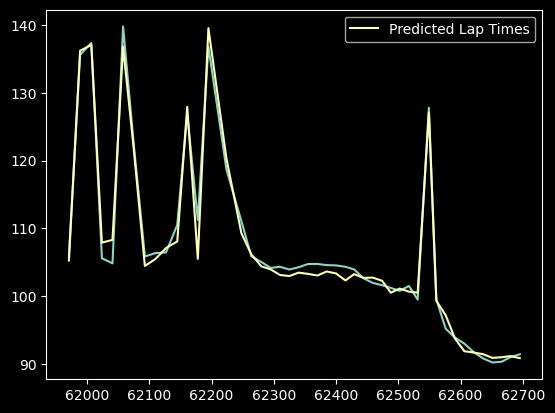

In [46]:
test = data[(data['Driver'] == 'VER') & (data['EventYear'] == 2025) & (data['EventName'] == 'British Grand Prix')]

p = model.predict(test.drop(columns=['LapTime']))

plt.plot(test.index,test['LapTime'].values)
plt.plot(test.index, p, label='Predicted Lap Times')
plt.legend()
plt.show()


In [92]:
import rec


t = rec.find_best_strategy(model, 'VER', 'Red Bull Racing', 'Miami Grand Prix', 90.25, 1, False, 75)



Evaluating Strategies: 100%|██████████| 500/500 [00:00<00:00, 7061117.85it/s]


In [95]:
t[3][2]

(np.float32(7298.617),
 [('HARD', 43), ('SOFT', 32)],
    Driver             Team Compound  FreshTyre  PitLap         EventName  \
 0     VER  Red Bull Racing     HARD       True   False  Miami Grand Prix   
 1     VER  Red Bull Racing     HARD      False   False  Miami Grand Prix   
 2     VER  Red Bull Racing     HARD      False   False  Miami Grand Prix   
 3     VER  Red Bull Racing     HARD      False   False  Miami Grand Prix   
 4     VER  Red Bull Racing     HARD      False   False  Miami Grand Prix   
 ..    ...              ...      ...        ...     ...               ...   
 70    VER  Red Bull Racing     SOFT      False   False  Miami Grand Prix   
 71    VER  Red Bull Racing     SOFT      False   False  Miami Grand Prix   
 72    VER  Red Bull Racing     SOFT      False   False  Miami Grand Prix   
 73    VER  Red Bull Racing     SOFT      False   False  Miami Grand Prix   
 74    VER  Red Bull Racing     SOFT      False   False  Miami Grand Prix   
 
     EventYear Track

In [91]:
importlib.reload(rec)

<module 'rec' from '/Users/zanderbonnet/Desktop/GCU/Proj/GCUProj/V2/rec.py'>